# Linear combinations of distribution functions

This example shows how to create linear combinations of ``surface`` and ``volume`` scattering distribution functions.

In [1]:
%matplotlib widget
from rt1_model import volume, surface
import matplotlib.pyplot as plt

## Volume scattering distributions

To create a linear-combination for volume-scattering distribution functions, simply provide a **list of 
weights and distributions** to the ``volume.LinComb`` class.

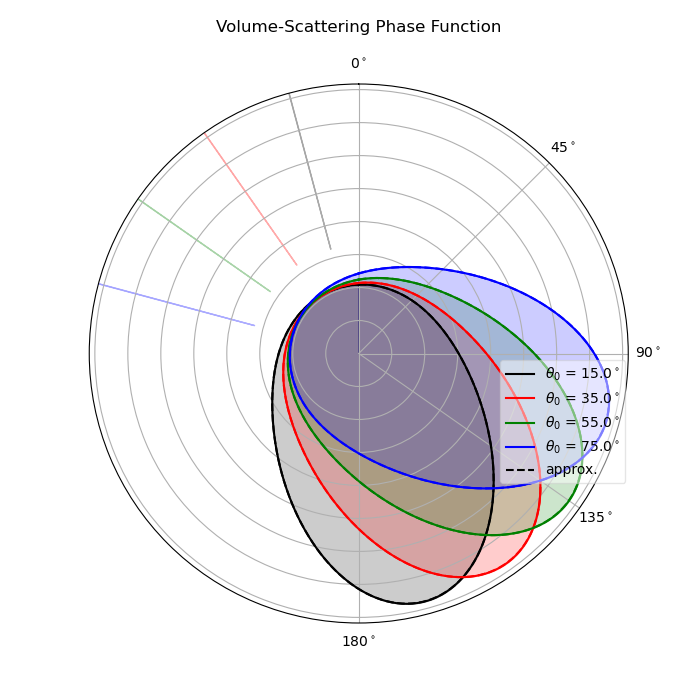

In [2]:
V = volume.LinComb([(0.5, volume.Isotropic()), (0.5, volume.HenyeyGreenstein(t=0.4, ncoefs=10))])
V.polarplot()

### Parametric linear combinations
It is also possible to use symbolic weights to obtain parametric linear-combinations! 

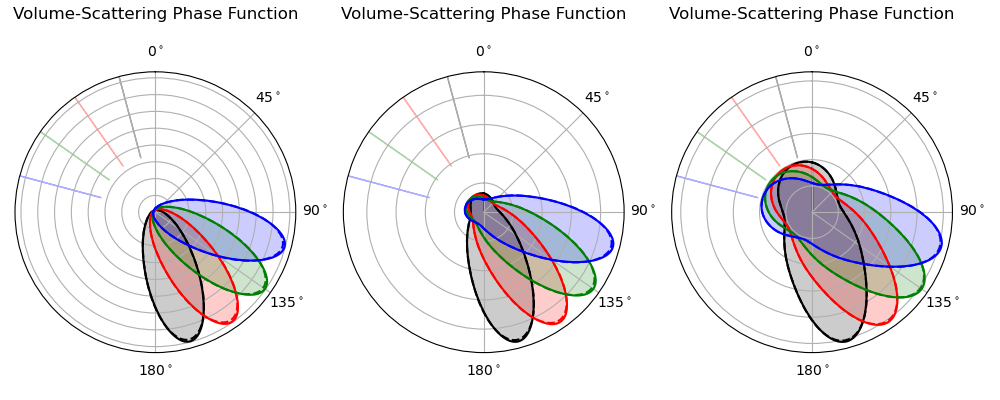

In [3]:
V = volume.LinComb([("w", volume.Rayleigh()), ("1-w", volume.HenyeyGreenstein(t="t", ncoefs=12))])

f = plt.figure(figsize=(10, 4))
ax1, ax2, ax3 = f.add_subplot(131, projection="polar"), f.add_subplot(132, projection="polar"), f.add_subplot(133, projection="polar")
V.polarplot(ax=ax1, param_dict=dict(w=0., t=0.6), legend=False)
V.polarplot(ax=ax2, param_dict=dict(w=0.5, t=0.6), legend=False)
V.polarplot(ax=ax3, param_dict=dict(w=0.8, t=0.6), legend=False)
f.tight_layout()

## Surface scattering distributions

Linear combinations of surface scattering distribution functions work completely similar!

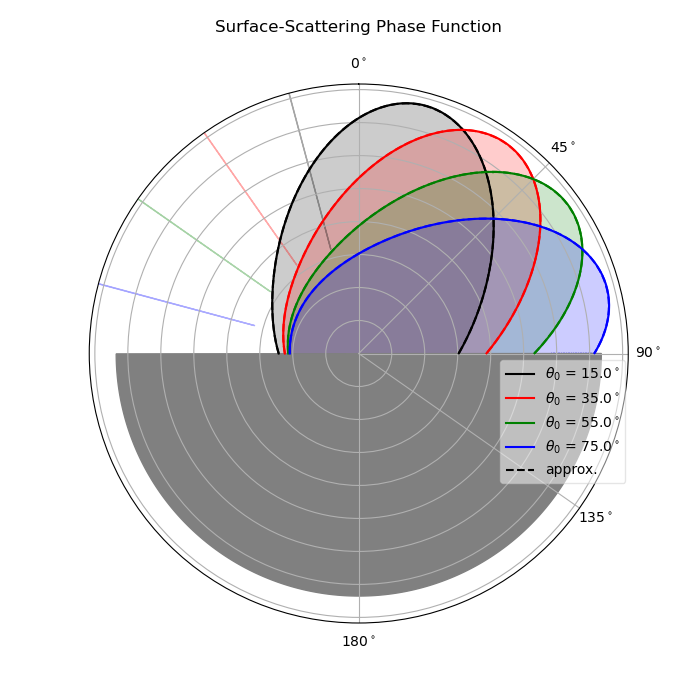

In [4]:
SRF = surface.LinComb([(0.5, surface.Isotropic()), (0.5, surface.HenyeyGreenstein(t=0.4, ncoefs=10))])
SRF.polarplot()

### Parametric linear combinations

Parametric combinations for surface scattering functions also work in the exact same way!

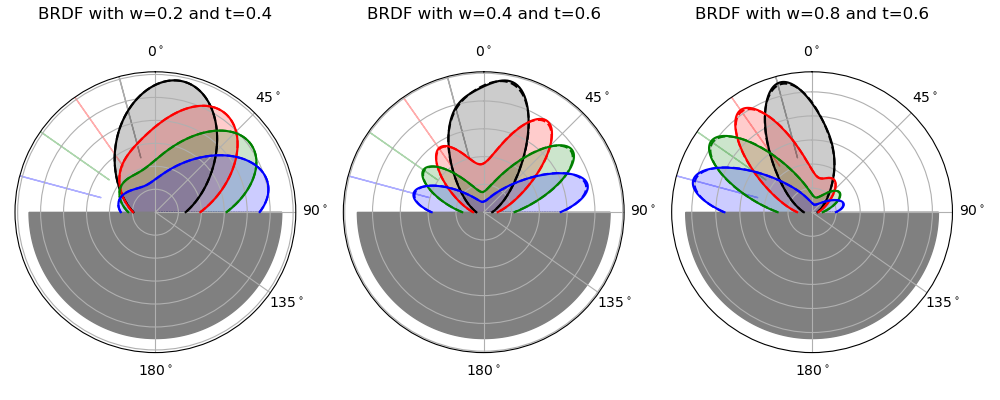

In [5]:
SRF = surface.LinComb([("w", surface.HenyeyGreenstein(t="-t", a=[-1, 1, 1], ncoefs=12)), 
                       ("1-w", surface.HenyeyGreenstein(t="t", ncoefs=12))])

f = plt.figure(figsize=(10, 4))
axes = (f.add_subplot(131, projection="polar"), 
        f.add_subplot(132, projection="polar"), 
        f.add_subplot(133, projection="polar"))

for ax, (w, t) in zip(axes, ((0.2, 0.4), (0.4, 0.6), (0.8, 0.6))):
    SRF.polarplot(ax=ax, param_dict=dict(w=w, t=t), legend=False, label=f"BRDF with w={w} and t={t}")
f.tight_layout()